## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
housing_data_path = "Austin_housing_data.csv"
census_path = "cencus_2010_2019.csv"

# Read the housing data and census results
housing_data = pd.read_csv(housing_data_path)
census_results = pd.read_csv(census_path)

# # Combine the data into a single dataset

# merge_df = pd.merge(housing_data, census_results, on="Mouse ID", how="outer")

# # Display the data table for preview
# merge_df

In [3]:
census_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Columns: 164 entries, SUMLEV to RNETMIG2019
dtypes: float64(54), int64(108), object(2)
memory usage: 4.0+ MB


In [4]:
housing_data.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [6]:
housing_data.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


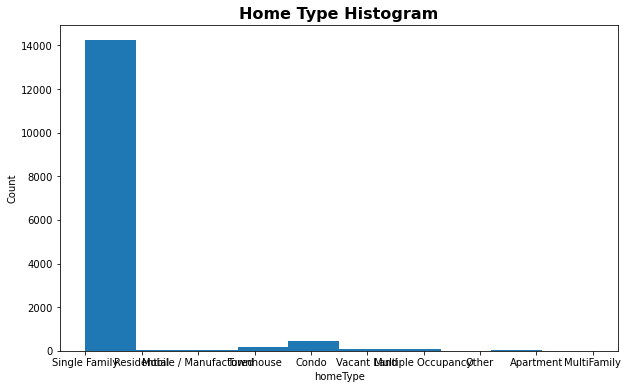

In [13]:
# making a histogram for type of home
plt.figure(figsize= (10,6))
plt.hist(housing_data.homeType)
plt.ylabel('Count')
plt.xlabel("homeType")
plt.title("Home Type Histogram", fontweight="bold", fontsize=16)
plt.show()

In [15]:
# based on the shape of the histogram, we can see majority of the data come from Single Family home.
# we will drop other types of home and only focus on Single Family homes.

mask = housing_data.homeType == "Single Family"
mask1 = housing_data[mask]
mask1

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,...,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,...,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg


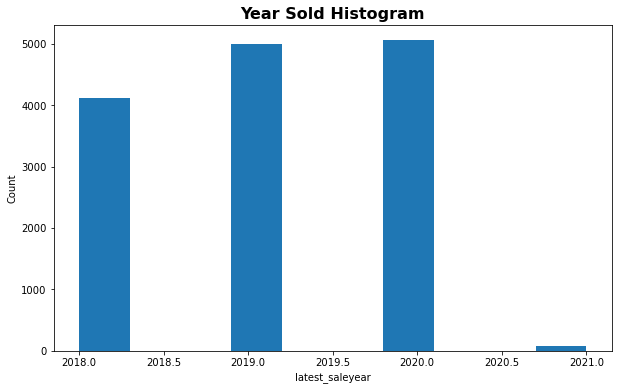

In [16]:
# build a histogram for year sold

plt.figure(figsize= (10,6))
plt.hist(mask1.latest_saleyear)
plt.ylabel('Count')
plt.xlabel("latest_saleyear")
plt.title("Year Sold Histogram", fontweight="bold", fontsize=16)
plt.show()

In [23]:
# based on the shape of the histogram for the year the house was sold, we have the least data from 2021. 
# Since 2021 has not been completed, this is our limitation for the incomplete data for 2021. We will remove 2021.


mask2 = mask1.latest_saleyear != 2021
mask3 = mask1[mask2]
mask3

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432672,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,2079918505,austin,1501 Alguno Rd #1,78757,Cute older home in the sought after Brentwood ...,30.333029,-97.732475,1.98,1,False,...,1,1,0.466667,7.000000,1189,16,1.0,3,1,2079918505_c080e2347f21b2caf88dbfa537d5135a-p_...
15164,125807167,austin,8707 Leo St,78745,Brand new construction. High end home that si...,30.189131,-97.825455,1.98,10,False,...,1,1,2.233333,5.666667,1537,16,5.0,6,2,125807167_7f8e224db822c9d7e562fe718ef387ce-p_f...
15165,29504086,austin,9013 Marsh Dr,78748,This 3 bedroom home is nestled among mature sh...,30.185915,-97.828415,1.98,2,False,...,1,1,2.133333,5.666667,1537,16,2.0,3,1,29504086_f55db59cbebad30d475f31e6aee0d020-p_f.jpg
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,...,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg


In [24]:
mask3.latest_saleyear

0        2019
1        2020
2        2019
3        2018
4        2018
         ... 
15163    2020
15164    2020
15165    2020
15166    2020
15167    2020
Name: latest_saleyear, Length: 14165, dtype: int64

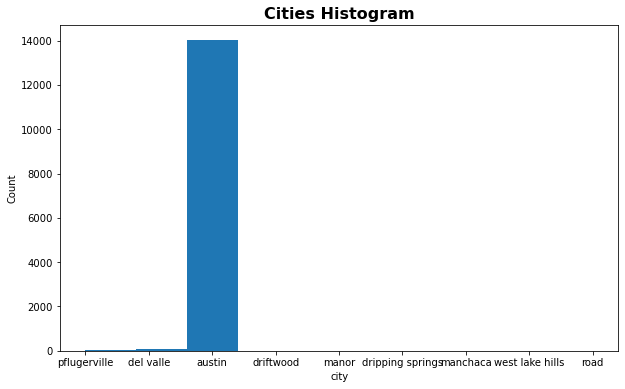

In [25]:
# build a histogram for cities

plt.figure(figsize= (10,6))
plt.hist(mask3.city)
plt.ylabel('Count')
plt.xlabel("city")
plt.title("Cities Histogram", fontweight="bold", fontsize=16)
plt.show()

In [ ]:
# Checking the number of .
merge_df["Mouse ID"].nunique()

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 


dup_mouse = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mouse


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mask = merge_df["Mouse ID"] != "g989"
new_df = merge_df.loc[mask].reset_index(drop=True)
new_df

In [ ]:
# Checking the number of mice in the clean DataFrame.
number_mouse = new_df["Mouse ID"].nunique()
number_mouse

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = new_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_mean

tumor_median = new_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_median

tumor_var = new_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_var

tumor_std = new_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_std

tumor_sem = new_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_sem



#summary dataframe
tumor_sum = pd.DataFrame({
    "Mean":tumor_mean,
    "Median":tumor_median,
    "Variance":tumor_var,
    "Standard Deviation":tumor_std, 
    "SEM":tumor_sem, 
})

#Display
tumor_sum

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

new_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])



## Bar and Pie Charts

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Filter the DataFrame down only to those columns to chart
pandas_mouse = new_df.groupby('Drug Regimen')['Mouse ID'].nunique()
pandas_mouse 

pandas_mouse.plot(kind="bar", figsize=(10,6), facecolor = "darksalmon")
plt.title('Mice per Drug Regimen Tested', fontsize=20)
plt.ylabel('Number of Mice', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=14)
plt.show()



In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

pyplot_mouse = new_df.groupby("Drug Regimen")["Mouse ID"].nunique().reset_index()
pyplot_mouse.rename(columns={"Mouse ID": "Mouse_Count"}, inplace=True)
pyplot_mouse 

plt.figure(figsize=(10,6))
plt.bar(panda_mouse["Drug Regimen"], panda_mouse.Mouse_Count, color="darksalmon")

plt.title("Mice per Drug Regimen", fontsize=20)
plt.xlabel("Drug Regimen", fontsize=14)
plt.ylabel("Number of Mice", fontsize=14)

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["orchid", "darkturquoise"]
pandas_pie= new_df.groupby('Sex').nunique()['Mouse ID']
pandas_pie.plot.pie(title="Mouse Gender Breakdown", colors=colors)
plt.figure(figsize=(10,6))

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_pie = new_df.groupby("Sex").nunique()["Mouse ID"]
pyplot_pie_df=pd.DataFrame(pyplot_pie)
plt.pie(pyplot_pie, colors=colors, labels=pyplot_pie.index)
plt.title("Mouse Gender Breakdown")
plt.show()
plt.figure(figsize=(10,6))

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

timepoint= new_df.groupby(["Mouse ID", "Drug Regimen"]).max()["Timepoint"]
timepoint_df=pd.DataFrame(timepoint)
timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

new_merge = pd.merge(timepoint_df, new_df, on=('Mouse ID','Timepoint'))
new_merge

mask = [True if x in ["Capomulin", "Ramicane", "Infubinol","Ceftamin"] else False for x in new_merge["Drug Regimen"]]
new_merge.loc[mask]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    
#Get just tumor volume for Capomulin
capomulin = new_merge.loc[new_merge["Drug Regimen"]=="Capomulin"]
capo_tum_volm=capomulin['Tumor Volume (mm3)']
capo_tum_volm

#Calculate quartiles, IQR & Boundaries for Capomulin
capo_quart=capo_tum_volm.quantile([.25,.5,.75])
lower_capo=capo_quart[.25]
ave_capo=capo_quart[.5]
upper_capo=capo_quart[.75]
capo_iqr =upper_capo-lower_capo
capo_lower_bound=lower_capo-(1.5*capo_iqr)
capo_upper_bound=upper_capo+(1.5*capo_iqr)

print("Drug: Capomulin")
print(f"The lower quartile of tumor volume for Capomulin is: {lower_capo}")
print(f"The upper quartile of tumor volume for Capomulin is: {upper_capo}")
print(f"The interquartile range of tumor volume for Capomulin is: {capo_iqr}")
print(f"The the median of tumor volume for Capomulin is: {ave_capo} ")
print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.\n")


#Get just tumor volume for Ramicane
ramicane = new_merge.loc[new_merge["Drug Regimen"]=="Ramicane"]
rami_tum_volm=ramicane['Tumor Volume (mm3)']
rami_tum_volm

#Calculate quartiles, IQR & Boundaries for Ramicane
rami_quart=rami_tum_volm.quantile([.25,.5,.75])
lower_rami=rami_quart[.25]
ave_rami=rami_quart[.5]
upper_rami=rami_quart[.75]
rami_iqr =upper_rami-lower_rami
rami_lower_bound=lower_rami-(1.5*rami_iqr)
rami_upper_bound=upper_rami+(1.5*rami_iqr)

print("Drug: Ramicane")
print(f"The lower quartile of tumor volume for Ramicane is: {lower_rami}")
print(f"The upper quartile of tumor volume for Ramicane is: {upper_rami}")
print(f"The interquartile range of tumor volume for Ramicane is: {rami_iqr}")
print(f"The the median of tumor volume for Ramicane is: {ave_rami} ")
print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.\n")


#Get just tumor volume for Infubinol
infubinol = new_merge.loc[new_merge["Drug Regimen"]=="Infubinol"]
inf_tum_volm=infubinol['Tumor Volume (mm3)']
inf_tum_volm

#Calculate quartiles, IQR & Boundaries for Infubinol
inf_quart=inf_tum_volm.quantile([.25,.5,.75])
lower_inf=inf_quart[.25]
ave_inf=inf_quart[.5]
upper_inf=inf_quart[.75]
inf_iqr =upper_inf-lower_inf
inf_lower_bound=lower_inf-(1.5*inf_iqr)
inf_upper_bound=upper_inf+(1.5*inf_iqr)

print("Drug: Infubinol")
print(f"The lower quartile of tumor volume for Infubinol is: {lower_inf}")
print(f"The upper quartile of tumor volume for Infubinol is: {upper_inf}")
print(f"The interquartile range of tumor volume for Infubinol is: {inf_iqr}")
print(f"The the median of tumor volume for Infubinol is: {ave_inf} ")
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.\n")


#Get just tumor volume for Ceftamin
ceftamin = new_merge.loc[new_merge["Drug Regimen"]=="Ceftamin"]
ceft_tum_volm=ceftamin['Tumor Volume (mm3)']
ceft_tum_volm

#Calculate quartiles, IQR & Boundaries for Ceftamin
ceft_quart=ceft_tum_volm.quantile([.25,.5,.75])
lower_ceft=ceft_quart[.25]
ave_ceft=ceft_quart[.5]
upper_ceft=ceft_quart[.75]
ceft_iqr =upper_ceft-lower_ceft
ceft_lower_bound=lower_ceft-(1.5*ceft_iqr)
ceft_upper_bound=upper_ceft+(1.5*ceft_iqr)

print("Drug: Ceftamin")
print(f"The lower quartile of tumor volume for Ceftamin is: {lower_ceft}")
print(f"The upper quartile of tumor volume for Ceftamin is: {upper_ceft}")
print(f"The interquartile range of tumor volume for Ceftamin is: {ceft_iqr}")
print(f"The the median of tumor volume for Ceftamin is: {ave_ceft} ")
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.\n")



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume based on Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot([capo_tum_volm, rami_tum_volm, inf_tum_volm, ceft_tum_volm])
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()


In [ ]:
ramicane

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_y793=new_df.loc[new_df["Mouse ID"]=="y793"]
mouse_y793
timepoint=mouse_y793["Timepoint"]
tumorvolume=mouse_y793["Tumor Volume (mm3)"]

plt.plot(timepoint, tumorvolume)
plt.title("Mouse y793 Tumor Volume with Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.figure(figsize=(10,6))

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

mouse_weight = capomulin["Weight (g)"]
tumor_volume = capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume, label ="Average Tumor Volume vs. Mouse Weight Using Capomulin" )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.figure(figsize=(10,6))

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


mouse_weight = capomulin["Weight (g)"]
tumor_volume = capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, tumor_volume)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, tumor_volume, label ="Average Tumor Volume vs. Mouse Weight Using Capomulin" )
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(22,30),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-value is: {rvalue}")
print(f"The r-squared value is: {rvalue**2}")
plt.show()


